In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from pandas.plotting import scatter_matrix

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [3]:
import os
import tarfile
import urllib

In [4]:
download_root = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
housing_path = os.path.join('data')
housing_url = download_root + 'datasets/housing/housing.tgz'

In [5]:
def fetch_housing_data(housing_url=housing_url, housing_path=housing_path):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [6]:
fetch_housing_data()

In [7]:
def load_housing_data(housing_path=housing_path):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [8]:
df = load_housing_data()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


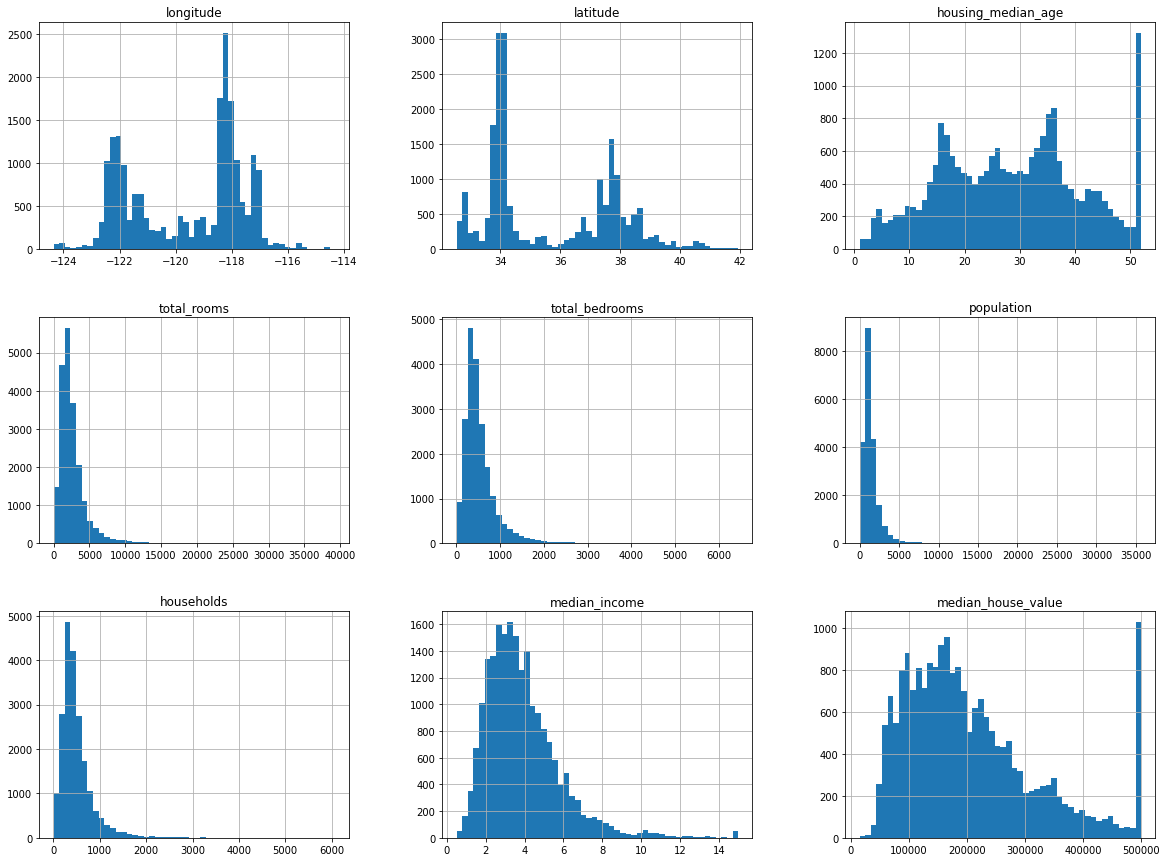

In [11]:
df.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

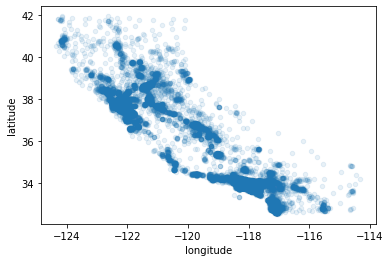

In [13]:
df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

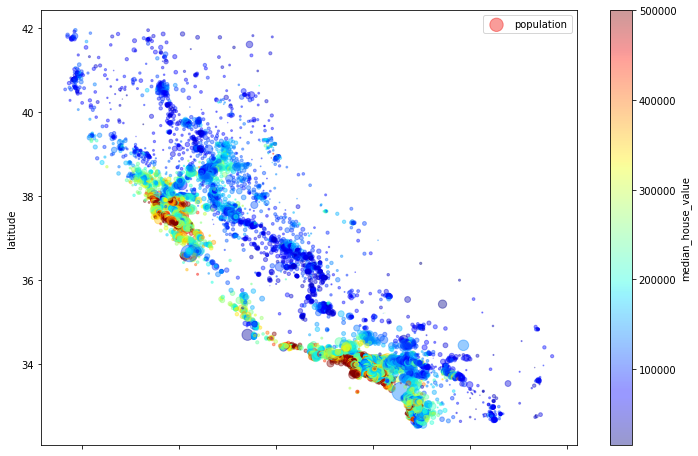

In [14]:
df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
        s=df['population']/100, label='population', figsize=(12,8),
        c='median_house_value', cmap='jet',colorbar=True)
plt.legend()
plt.show()

In [15]:
correlation = df.corr()['median_house_value'].sort_values(ascending=False)

In [16]:
correlation

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

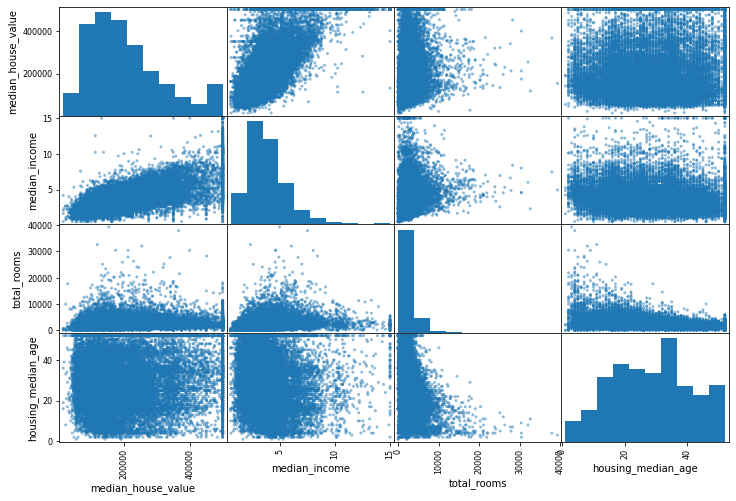

In [17]:
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(df[attributes],figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

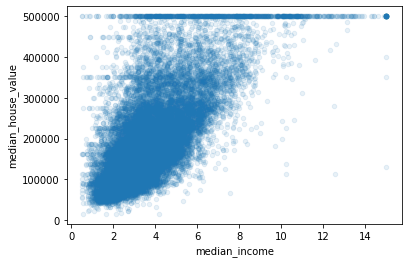

In [19]:
df.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

In [20]:
df.corr()['total_bedrooms'].sort_values(ascending=False)

total_bedrooms        1.000000
households            0.979728
total_rooms           0.930380
population            0.877747
longitude             0.069608
median_house_value    0.049686
median_income        -0.007723
latitude             -0.066983
housing_median_age   -0.320451
Name: total_bedrooms, dtype: float64

In [23]:
df['rooms_per_household'] = df['total_rooms']/df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
df['population_per_household'] = df['population']/df['households']

In [24]:
correlation = df.corr()['median_house_value'].sort_values(ascending=False)
correlation

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [104]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [105]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [86]:
y.shape

(20640,)

In [87]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [88]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

In [89]:
 rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

 class AttrbCombination(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix]/X[:, households_ix]
        population_per_household = X[:, population_ix]/X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = AttrbCombination(add_bedrooms_per_room=False)
df_extra_attribs = attr_adder.transform(X.values)

In [90]:
cat_column = X.select_dtypes(include='object').columns
num_column = X.select_dtypes(exclude='object').columns
cat_pipeline = Pipeline([('onehot',OneHotEncoder(handle_unknown='ignore'))])
num_pipeline = Pipeline([('num_imp', SimpleImputer(strategy='median', add_indicator=False)),
                          ('feature_add', AttrbCombination()),
                          ('std_scaler', StandardScaler())])
transformer_pipeline = ColumnTransformer([
    ('cat', cat_pipeline, cat_column),
    ('num', num_pipeline, num_column)
])

In [91]:
transformer_pipeline

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['ocean_proximity'], dtype='object')),
                                ('num',
                                 Pipeline(steps=[('num_imp',
                                                  SimpleImputer(strategy='median')),
                                                 ('feature_add',
                                                  AttrbCombination()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household'],
      dtype='object'))])

In [96]:
ml_pipeline = Pipeline([('transformer',transformer_pipeline),
                        ('RFR', RandomForestRegressor())])

In [97]:
ml_pipeline

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['ocean_proximity'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('feature_add',
                                                                   AttrbCombination()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household'],
      dtype='object'))])),
                ('RFR', RandomForestRegressor())])

In [106]:
ml_pipeline.fit(X,y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['ocean_proximity'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('feature_add',
                                                                   AttrbCombination()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household'],
      dtype='object'))])),
                ('RFR', RandomForestRegressor())])

In [150]:
model = pd.DataFrame({'predict':ml_pipeline.predict(X), 'actual':y})


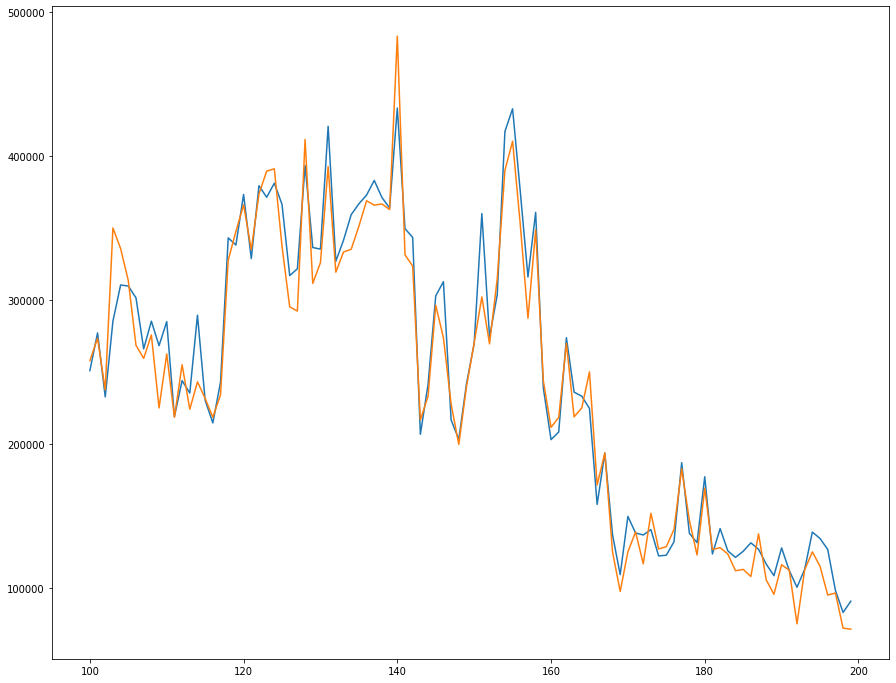

In [156]:
plt.figure(figsize=(15,12))
plt.plot(model[100:200])

In [117]:
ml_pipeline.score(X,y)

0.9750034017537257

In [160]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ml_pipeline, X,y,scoring='neg_mean_squared_error', cv=10)


In [162]:
RMSE_scores = np.sqrt(-scores)
print(RMSE_scores)

[96505.95427272 47310.87682335 64992.26441301 56605.94877636
 61280.74856112 60290.5289016  47055.7826918  79329.50191357
 74402.08239829 49108.07296472]


In [159]:
from sklearn.metrics import mean_squared_error
final_mse = mean_squared_error(y, ml_pipeline.predict(X))
print(final_mse)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

332842278.9585091
18243.965549148274


In [174]:
ml_pipeline.named_steps

{'transformer': ColumnTransformer(transformers=[('cat',
                                  Pipeline(steps=[('onehot',
                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                  Index(['ocean_proximity'], dtype='object')),
                                 ('num',
                                  Pipeline(steps=[('num_imp',
                                                   SimpleImputer(strategy='median')),
                                                  ('feature_add',
                                                   AttrbCombination()),
                                                  ('std_scaler',
                                                   StandardScaler())]),
                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'rooms_per_household', 'bedrooms_per_room', 'population_per_hous

In [181]:
ml_pipeline.named_steps['transformer']

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['ocean_proximity'], dtype='object')),
                                ('num',
                                 Pipeline(steps=[('num_imp',
                                                  SimpleImputer(strategy='median')),
                                                 ('feature_add',
                                                  AttrbCombination()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household'],
      dtype='object'))])

In [177]:
import pickle
with open('housing_pickle','wb') as f:
    pickle.dump(ml_pipeline,f)


In [179]:
with open('housing_pickle','rb') as f:
    model = pickle.load(f)

In [180]:
model.predict(X)

array([434470.07, 390272.1 , 377528.08, ...,  93107.  ,  84471.  ,
        86814.  ])